<a href="https://colab.research.google.com/github/sogand73/OCT-Classification/blob/main/representative_dictionary_learning_for_OCT_(Kermany_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
from PIL import Image
import cv2
import shutil
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import MiniBatchDictionaryLearning
from joblib import dump, load

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 9.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# @title Data preparing for Dictionary Learning

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download paultimothymooney/kermany2018/

In [ ]:
!unzip kermany2018.zip

In [ ]:
# @title Selection of some images as the dataset for dictionary learning (open and store)

In [3]:
shutil.rmtree('/content/oct_my_dictl_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dictl_dataset'

In [4]:
!mkdir '/content/oct_my_dictl_dataset'


In [5]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/oct_my_dictl_dataset/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [6]:
# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset/train/'
#dataset_folder = '/content/OCT2017 /train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dictl_dataset/'  # Replace with your destination folder path
images =[]
#for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for file_name in files_to_copy[:20]:
    if file_name.endswith('.jpeg'):  # Specify the image file formats
          source_path = os.path.join(source_folder, file_name)
          destination_path = os.path.join(destination_folder, subfolder) + '/'
          shutil.copy(source_path, destination_path)
          img = Image.open(os.path.join(destination_path, file_name)) # This returns an image object
          #print(img.mode)
          #img = img.convert('RGB')
          img = np.asarray(img) # convert it to ndarray
          img = cv2.resize(img, (512, 512))
          images.append(img)
#return np.array(images)
          #print(f"Copied: {file_name}")






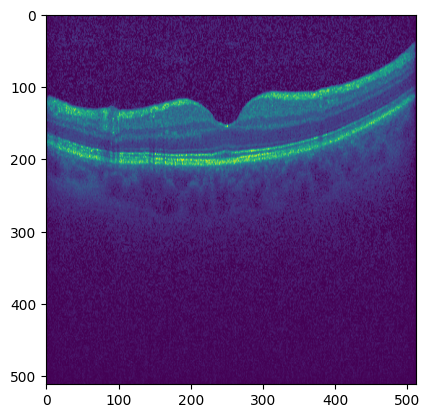

In [9]:
plt.imshow(images[2])

In [ ]:
#@title dictionary Learning Processs

In [7]:
# Load dictionary learning images
image_data = np.asarray(images)
n_images, height, width = image_data.shape

In [8]:
# Flatten the image data
X = image_data.reshape((n_images, height * width))

# Explicitly cast the array to float before division
X = X.astype(float)

# Rescale pixel values to the range [0, 1] for MiniBatchDictionaryLearning
X /= 255.0


# CLASSES: 'NORMAL', 'DME', 'DRUSEN', 'CNV'
#X_NORMAL, X_DME, X_DRUSEN, X_CNV = X[:10], X[10:20], X[20:30], X[30:]
#X_NORMAL, X_DME, X_CNV = X[:10], X[10:20], X[20:30]
X_NORMAL, X_DME, X_CNV = X[:20], X[20:40], X[40:60]

In [21]:
# Create a dictionary learning model for NORMAL data
n_components = 18**2  # Number of atoms in the dictionary (old:100)
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 60  # Number of iterations (old:100)

dl_model_NORMAL = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_NORMAL -= np.mean(X_NORMAL, axis=0)
X_NORMAL /= np.std(X_NORMAL, axis=0)

# Fit the model to the flattened NORMAL image data
dl_model_NORMAL.fit(X_NORMAL)
ATOMS_NORMAL = dl_model_NORMAL.components_
X_NORMAL_tr = dl_model_NORMAL.transform(X_NORMAL)

#save the model
dump(dl_model_NORMAL, '/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_NORMAL_18_60.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [9]:
# Create a dictionary learning model for DME data
n_components = 18**2  # Number of atoms in the dictionary (old:100)
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 60  # Number of iterations (old:100)

dl_model_DME = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_DME -= np.mean(X_DME, axis=0)
X_DME /= np.std(X_DME, axis=0)

# Fit the model to the flattened DME image data
dl_model_DME.fit(X_DME)
ATOMS_DME = dl_model_DME.components_
X_DME_tr = dl_model_DME.transform(X_DME)

#save the model
dump(dl_model_DME, '/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_DME_18_60.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [11]:
# Create a dictionary learning model for CNV data
n_components = 18**2  # Number of atoms in the dictionary (old:100)
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 60  # Number of iterations (old:100)

dl_model_CNV = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_CNV -= np.mean(X_CNV, axis=0)
X_CNV /= np.std(X_CNV, axis=0)

# Fit the model to the flattened CNV image data
dl_model_CNV.fit(X_CNV)
ATOMS_CNV = dl_model_CNV.components_
X_CNV_tr = dl_model_CNV.transform(X_CNV)

#save the model
dump(dl_model_CNV, '/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_CNV_18_60.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [22]:
!mkdir '/content/atoms'


mkdir: cannot create directory ‘/content/atoms’: File exists


In [23]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/atoms/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [24]:

#atoms save as an image
atoms_all = ATOMS_NORMAL
#for atom in [[ATOMS_NORMAL,'NORMAL'], [ATOMS_DME,'DME'], [ATOMS_DRUSEN,'DRUSEN'], [ATOMS_CNV,'CNV']]:
for atom in [[ATOMS_NORMAL,'NORMAL'], [ATOMS_DME,'DME'], [ATOMS_CNV,'CNV']]:
  for i in range(n_components):
    atoms_save = atom[0][i].reshape((512, 512))*255
    atoms_save = atoms_save.astype(np.uint8)
    destination_atom_folder = os.path.join('/content/atoms/', atom[1], str(i)+'.jpeg')
    cv2.imwrite(destination_atom_folder, atoms_save)

0.3862654320987654
1.9924772020815423e-12


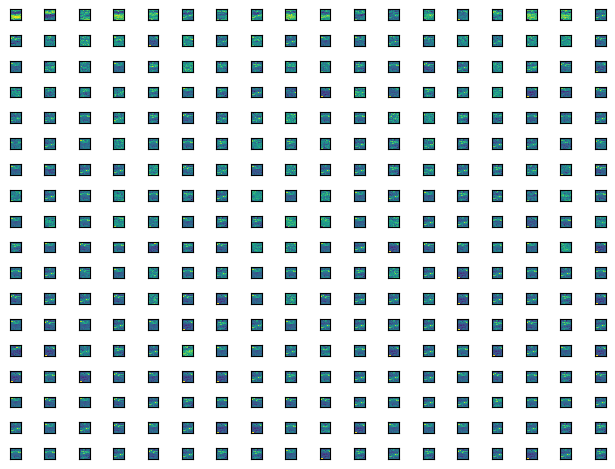

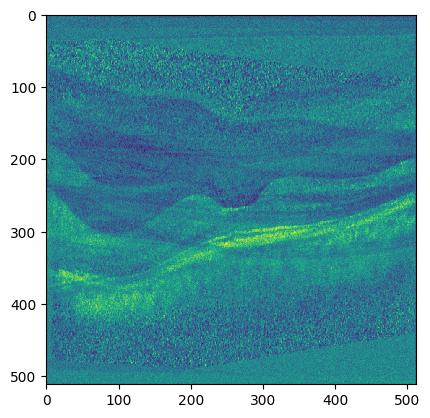

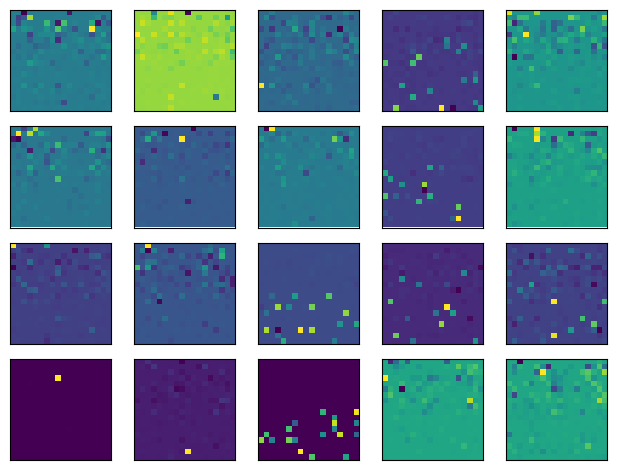

In [25]:
#NORMAL data

#Feature extraction percent
print(np.mean(X_NORMAL_tr == 0))
X_NORMAL_hat = X_NORMAL_tr @ dl_model_NORMAL.components_
print(np.mean(np.sum((X_NORMAL_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_NORMAL
fig, axes = plt.subplots(nrows=18, ncols=18)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[210].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_NORMAL_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_NORMAL_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((18, 18))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.39151234567901233
1.116218651756169e-12


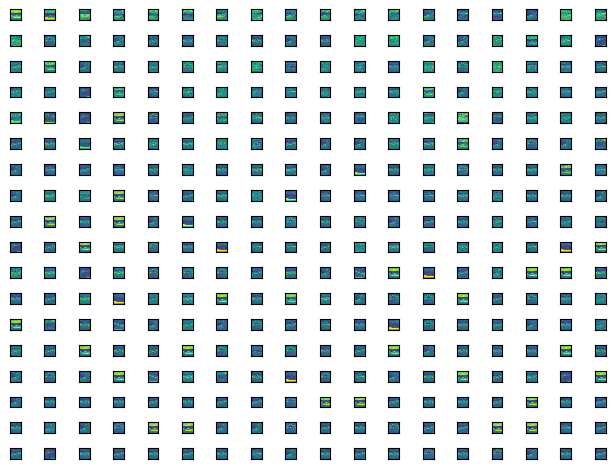

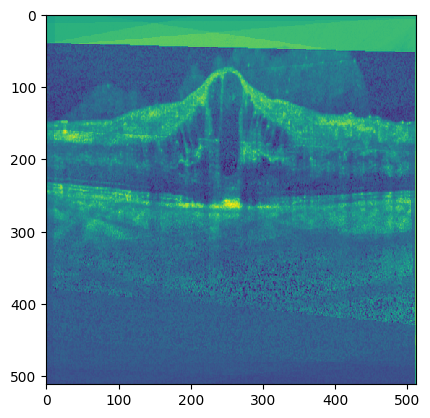

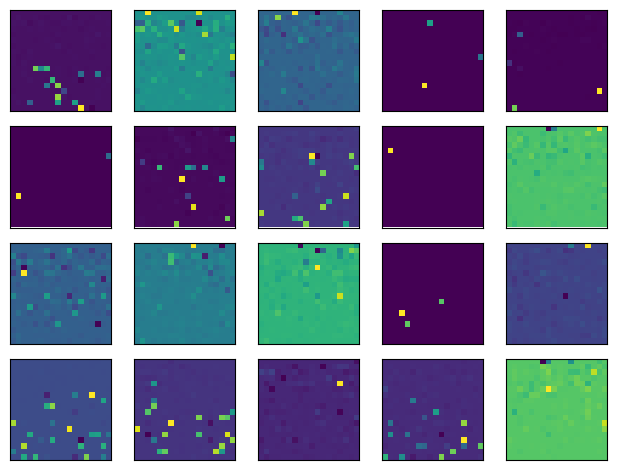

In [16]:
#DME data

#Feature extraction percent
print(np.mean(X_DME_tr == 0))
X_DME_hat = X_DME_tr @ dl_model_DME.components_
print(np.mean(np.sum((X_DME_hat - X_DME) ** 2, axis=1) / np.sum(X_DME ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_DME
fig, axes = plt.subplots(nrows=18, ncols=18)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[210].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_DME_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_DME_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((18, 18))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.44506172839506175
1.071639746656157e-12


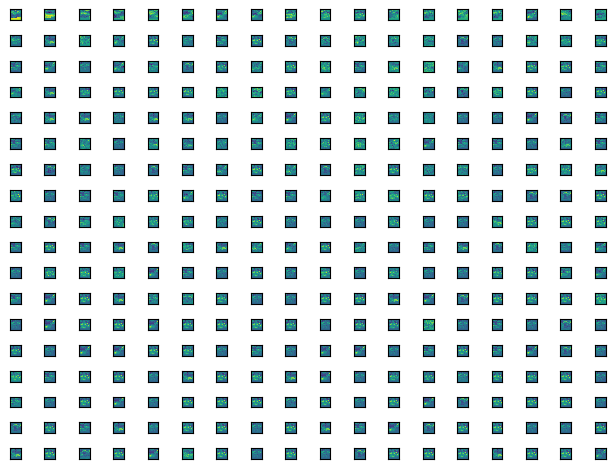

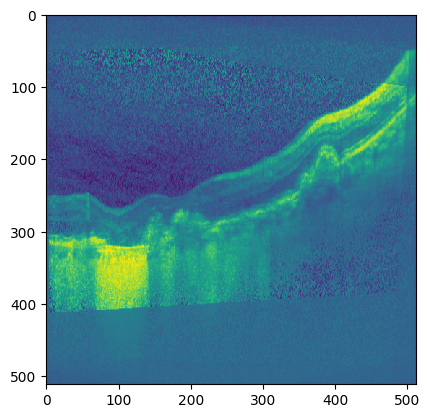

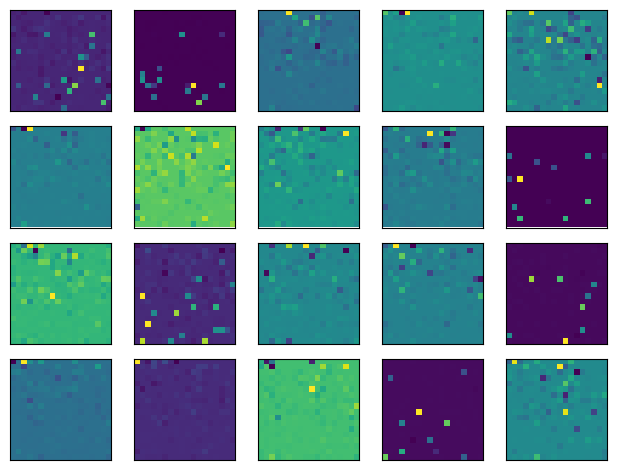

In [17]:
#CNV data

#Feature extraction percent
print(np.mean(X_CNV_tr == 0))
X_CNV_hat = X_CNV_tr @ dl_model_CNV.components_
print(np.mean(np.sum((X_CNV_hat - X_CNV) ** 2, axis=1) / np.sum(X_CNV ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_CNV
fig, axes = plt.subplots(nrows=18, ncols=18)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[210].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_CNV_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_CNV_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((18, 18))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [ ]:
#@title Number of training iterations comparison

In [ ]:
sparsity1 = []
RE1 = []
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
  print(f'iteration {i} begins:')
  dl_model_NORMAL = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=i, verbose=True)
  dl_model_NORMAL.fit(X_NORMAL)

  #save the model
  save_dir = os.path.join('/content/dl_model_NORMAL_iter' + f'{i}' + '.joblib')
  dump(dl_model_NORMAL, save_dir)

  #Feature extraction percent
  X_NORMAL_tr = dl_model_NORMAL.transform(X_NORMAL)
  X_NORMAL_hat = X_NORMAL_tr @ dl_model_NORMAL.components_

  sparsity = np.mean(X_NORMAL_tr == 0)
  sparsity1.append(sparsity)
  re = np.mean(np.sum((X_NORMAL_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1))
  RE1.append(re)
  print(f'sparsity percentage: {sparsity}')
  print(f'RE: {re}')


# Plot the reconstruction error over iterations
plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], RE1 + RE2, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Reconstruction Error')
plt.title('Convergence Analysis')
plt.show()

# Plot the reconstruction error over iterations
plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], sparsity1 + sparsity2, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Sparsity Level')
plt.title('Convergence Analysis')
plt.show()



In [ ]:
#@title Number of learned atoms comparison

In [ ]:
n_components = [10**2, 12**2, 14**2, 16**2, 18**2, 20**2]  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations


for i in n_components:
  print(f'iteration {i} begins:')
  dl_model_NORMAL = MiniBatchDictionaryLearning(n_components=i, alpha=alpha, batch_size=batch_size, n_iter=n_iter, verbose=True)
  dl_model_NORMAL.fit(X_NORMAL)

  #save the model
  save_dir = os.path.join('/content/dl_model_NORMAL_atoms' + f'{i}' + '.joblib')
  dump(dl_model_NORMAL, save_dir)

  #Feature extraction percent
  X_NORMAL_tr = dl_model_NORMAL.transform(X_NORMAL)
  X_NORMAL_hat = X_NORMAL_tr @ dl_model_NORMAL.components_

  sparsity = np.mean(X_NORMAL_tr == 0)
  sparsity3.append(sparsity)
  re = np.mean(np.sum((X_NORMAL_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1))
  RE3.append(re)
  print(f'sparsity percentage: {sparsity}')
  print(f'RE: {re}')


# Plot the reconstruction error over iterations
plt.plot([10**2, 12**2, 14**2, 16**2, 18**2, 20**2], RE3, marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Reconstruction Error')
plt.title('Convergence Analysis')
plt.show()

# Plot the reconstruction error over iterations
plt.plot([10**2, 12**2, 14**2, 16**2, 18**2, 20**2], sparsity3, marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Sparsity Level')
plt.title('Convergence Analysis')
plt.show()




In [ ]:
#copy file to google drive
!cp /content/drive/MyDrive/oct_classification/kermany_dataset/dl_model_NORMAL_atoms400.joblib /content/drive/MyDrive/oct_classification/kermany_dataset/test14_repeatability/


In [ ]:
#@title Classification using YOLOv8

In [ ]:
!pip install ultralytics

In [26]:
shutil.rmtree('/content/oct_my_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dataset'

In [27]:
import os
!mkdir '/content/oct_my_dataset'
!mkdir '/content/oct_my_dataset/train'
!mkdir '/content/oct_my_dataset/test'
!mkdir '/content/oct_my_dataset/val'


In [28]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_dataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_dataset/test/',subfolder)
  val_subfolder = os.path.join('/content/oct_my_dataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  os.makedirs(val_subfolder, exist_ok=True)

In [29]:
import shutil


# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset'  # Replace with your source folder path
#dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/'  # Replace with your destination folder path

#for folder in [['train/',500], ['test/',100], ['val/',8]]
for folder in [['train/',600], ['test/',200]]:
  #for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  for subfolder in ['NORMAL', 'DME', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            shutil.copy(source_path, destination_path)
            #print(f"Copied: {file_name}")


In [30]:
#Separate and store Val data from train data
# Define source and destination directories
dataset_folder = '/content/oct_my_dataset/train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/val/'  # Replace with your destination folder path



for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for num in range(500,600):
    file_name = files_to_copy[num]
    if file_name.endswith('.jpeg'):  # Specify the image file formats
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, subfolder) + '/'
        shutil.copy(source_path, destination_path)
        #print(f"Copied: {file_name}")

In [31]:
shutil.rmtree('/content/oct_my_trdataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_trdataset'

In [32]:
import os
!mkdir '/content/oct_my_trdataset'
!mkdir '/content/oct_my_trdataset/train'
!mkdir '/content/oct_my_trdataset/test'
!mkdir '/content/oct_my_dataset/val'

mkdir: cannot create directory ‘/content/oct_my_dataset/val’: File exists


In [33]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_trdataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_trdataset/test/',subfolder)
  val_subfolder = os.path.join('/content/oct_my_trdataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  os.makedirs(val_subfolder, exist_ok=True)

In [34]:
import shutil


# Define source and destination directories
dataset_folder = '/content/oct_my_dataset'
#dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_trdataset/'  # Replace with your destination folder path

img_train = []
img_test = []
img_val = []


#for folder in [['train/',500], ['test/',100]]:
for folder in [['train/',500], ['test/',200], ['val/',100]]:
  #for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  for subfolder in ['NORMAL', 'DME', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            #shutil.copy(source_path, destination_path)
            img = Image.open(source_path) # This returns an image object
            #print(img.mode)
            #img = img.convert('RGB')
            img = np.asarray(img) # convert it to ndarray
            img = cv2.resize(img, (512, 512))
            img = img.reshape((1, 512 * 512))
            img = img.astype(float)
            img /= 255.0

            # #Normalized data
            #img -= np.mean(img, axis=0)
            #img /= np.std(img, axis=0)


            if subfolder == 'NORMAL':
              img_tr = dl_model_NORMAL.transform(img)
            elif subfolder == 'DME':
              img_tr = dl_model_DME.transform(img)
            #elif subfolder == 'DRUSEN':
              #img_tr = dl_model_DRUSEN.transform(img)
            elif subfolder == 'CNV':
              img_tr = dl_model_CNV.transform(img)



            img_tr2d = img_tr.reshape((18, 18))*255
            img_tr2d = img_tr2d.astype(np.uint8)

            # Save the image to the specified directory
            save_destination = os.path.join(destination_path, file_name)
            #image_to_save.save(save_destination)
            cv2.imwrite(save_destination, img_tr2d)

            if folder[0] == 'train/':
              img_train.append(img_tr2d)
            elif folder[0] == 'test/':
              img_test.append(img_tr2d)
            elif folder[0] == 'val/':
              img_val.append(img_tr2d)


            #images.append(img_tr2d)
            #print(f"Copied: {file_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the di

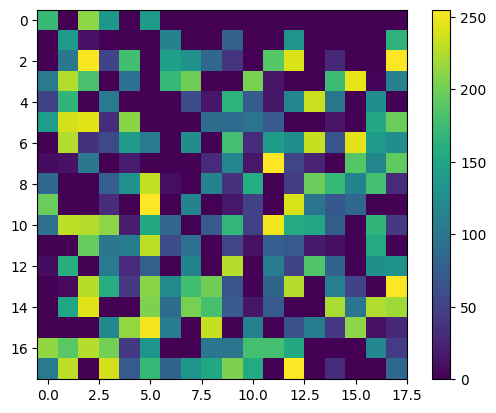

In [36]:
plt.imshow(img_tr2d.reshape((18, 18)), interpolation='nearest')
plt.colorbar()

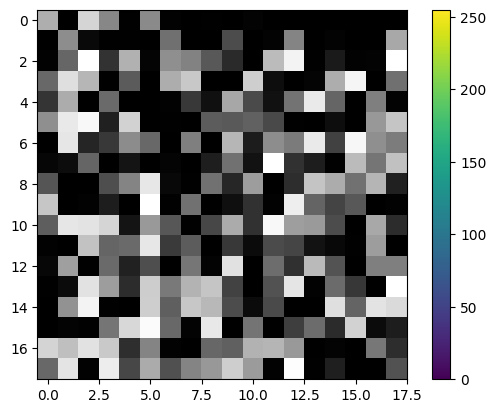

In [37]:
#save_destination = '/content/CNV-172472-132 (1).jpeg'
c = cv2.imread(save_destination)
plt.imshow(c, interpolation='nearest')
plt.colorbar()

In [40]:
from ultralytics import YOLO

# Load a model

#model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
#model = YOLO('/content/best.pt') #Load the initial weights, gained from the former model training on this data (previous line)

model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/oct_my_trdataset', epochs=100, imgsz=18, batch=64)

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs


100%|██████████| 5.30M/5.30M [00:00<00:00, 102MB/s]

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs
Transferred 158/158 items from pretrained weights


Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/oct_my_trdataset, epochs=100, time=None, patience=50, batch=64, imgsz=18, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 6.23M/6.23M [00:00<00:00, 120MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[18] must be multiple of max stride 32, updating to [32]


train: Scanning /content/oct_my_trdataset/train... 1500 images, 0 corrupt: 100%|██████████| 1500/1500 [00:00<00:00, 5706.60it/s]

train: New cache created: /content/oct_my_trdataset/train.cache



val: Scanning /content/oct_my_trdataset/val... 300 images, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 2679.75it/s]

val: New cache created: /content/oct_my_trdataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.264G      1.318         64         32:  38%|███▊      | 9/24 [00:01<00:02,  7.28it/s]

      1/100     0.264G      1.299         64         32:  92%|█████████▏| 22/24 [00:03<00:00, 10.42it/s]
100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]
      1/100     0.264G      1.298         28         32: 100%|██████████| 24/24 [00:03<00:00,  6.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.09it/s]

                   all      0.347          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.262G      1.249         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.49it/s]

                   all      0.373          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.262G        1.2         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.58it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.262G      1.131         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.88it/s]

                   all      0.403          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.262G      1.137         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 53.70it/s]

                   all       0.47          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.262G       1.11         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.19it/s]

                   all       0.54          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.262G      1.097         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 60.70it/s]

                   all      0.623          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.262G      1.045         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 79.41it/s]

                   all       0.66          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.262G      1.072         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.67it/s]

                   all      0.677          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.262G          1         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.79it/s]

                   all      0.637          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.262G     0.9667         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.21it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.262G     0.9575         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.71it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.262G     0.9333         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.33it/s]

                   all      0.733          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.262G     0.8947         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 20.54it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.262G      0.897         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.86it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.262G     0.8896         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 46.09it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.262G     0.8416         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.20it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.262G     0.8314         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.20it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.262G      0.801         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.69it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.262G     0.7884         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.94it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.262G     0.7763         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.53it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.262G     0.7702         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.30it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.262G      0.781         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.262G     0.7976         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 20.50it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.262G     0.7637         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.94it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.262G     0.7086         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.76it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.262G     0.7212         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.20it/s]

                   all      0.893          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.262G     0.7161         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.45it/s]

                   all      0.883          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.262G     0.7104         28         32: 100%|██████████| 24/24 [00:03<00:00,  6.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.81it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.262G     0.6926         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.99it/s]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.262G     0.7152         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.10it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.262G     0.6666         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.53it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.262G      0.705         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.02it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.262G     0.7062         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.21it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.262G     0.6503         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.73it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.262G     0.6671         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.09it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.262G     0.6836         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.41it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.262G     0.6276         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.86it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.262G     0.6589         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.18it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.262G     0.6455         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.51it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.262G     0.6266         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.14it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.262G     0.6671         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 47.03it/s]


                   all       0.94          1

      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.262G     0.6193         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.70it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.262G     0.6123         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.00it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.262G     0.6137         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.37it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.262G     0.6058         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.74it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.262G     0.6504         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.84it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.262G     0.6285         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.72it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.262G     0.6268         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.33it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.262G     0.6213         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.05it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.262G     0.6032         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.89it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.262G     0.5824         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.40it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.262G     0.6035         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.90it/s]


                   all      0.953          1

      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.262G     0.5699         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.27it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.262G     0.5934         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.03it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.262G     0.5413         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.21it/s]


                   all       0.95          1

      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.262G     0.5622         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.49it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.262G     0.5708         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.78it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.262G     0.5891         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.97it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.262G     0.5905         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.96it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.262G     0.5592         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.39it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.262G     0.5827         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.34it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.262G     0.5775         28         32: 100%|██████████| 24/24 [00:03<00:00,  6.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.57it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.262G     0.5629         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.02it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.262G     0.5321         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 76.33it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.262G     0.5612         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.94it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.262G     0.5622         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.39it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.262G     0.5207         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.93it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.262G     0.5552         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.46it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.262G     0.5486         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.35it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.262G      0.544         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.49it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.262G     0.5404         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.79it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.262G     0.5947         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.81it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.262G     0.5458         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.38it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.262G      0.509         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.26it/s]


                   all      0.953          1

      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.262G     0.5228         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.11it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.262G      0.543         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.01it/s]


                   all      0.953          1

      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.262G     0.5371         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.85it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.262G     0.4838         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.24it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.262G     0.5264         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.61it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.262G     0.5168         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.79it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.262G     0.5128         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.94it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.262G     0.5046         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.54it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.262G     0.5092         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.99it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.262G     0.5054         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.49it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.262G     0.4941         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.38it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.262G     0.5099         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.94it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.262G     0.4965         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.07it/s]


                   all      0.953          1

      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.262G     0.5089         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.07it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.262G     0.4932         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.43it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.262G     0.4766         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.08it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.262G      0.479         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.51it/s]


                   all      0.953          1

      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.262G     0.4762         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.74it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.262G     0.5163         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.92it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.262G     0.5455         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.33it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.262G     0.4889         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.38it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.262G     0.4665         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.32it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.262G     0.4759         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.76it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.262G     0.4904         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 68.18it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.262G     0.5013         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.51it/s]

                   all      0.957          1



100 epochs completed in 0.082 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/oct_my_trdataset/train... found 1500 images in 3 classes ✅ 
val: /content/oct_my_trdataset/val... found 300 images in 3 classes ✅ 
test: /content/oct_my_trdataset/test... found 600 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


                   all      0.967          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [43]:
# Validate the modelblob:https://colab.research.google.com/f8428635-acf6-400f-b52f-379198002792
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
train: /content/oct_my_trdataset/train... found 1500 images in 3 classes ✅ 
val: /content/oct_my_trdataset/val... found 300 images in 3 classes ✅ 
test: /content/oct_my_trdataset/test... found 602 images in 4 classes: ERROR ❌️ requires 3 classes, not 4


val: Scanning /content/oct_my_trdataset/val... 300 images, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.43it/s]


                   all      0.967          1
Speed: 0.0ms preprocess, 2.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


0.9666666984558105

In [ ]:
# @title Predict using the model



In [41]:
#test_score = model.predict(source='/content/oct_my_trdataset/test/Normal')
#0:AMD 1:DME 2:Normal
label_predict = []
label_conf = []
label_true = []

test_path = '/content/oct_my_trdataset/test/'

for subfolder in ['NORMAL', 'DME', 'CNV']:
  test_img_dir = os.path.join(test_path, subfolder)
  test_img = model(test_img_dir)

  for num in range(200):
    label_true.append(subfolder)
    label_predict.append(test_img[num].names[test_img[num].probs.top1])
    label_conf.append(test_img[0].probs.top1conf)

print(label_true)
print(label_predict)
print(label_conf)


image 1/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-101880-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 13.0ms
image 2/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1025847-1.jpeg: 32x32 NORMAL 0.98, CNV 0.02, DME 0.00, 13.1ms
image 3/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1038998-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 12.9ms
image 4/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1042462-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.1ms
image 5/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1058176-1.jpeg: 32x32 NORMAL 0.97, CNV 0.03, DME 0.00, 8.0ms
image 6/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1063128-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.8ms
image 7/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1073137-1.jpeg: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 11.3ms
image 8/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1081406-1.jpeg: 32x32 NORMAL 0.79, DME 0.21, CNV 0.00, 6.6ms
image 9/200 /content/oct_my_trdataset/test/NORMAL/NO

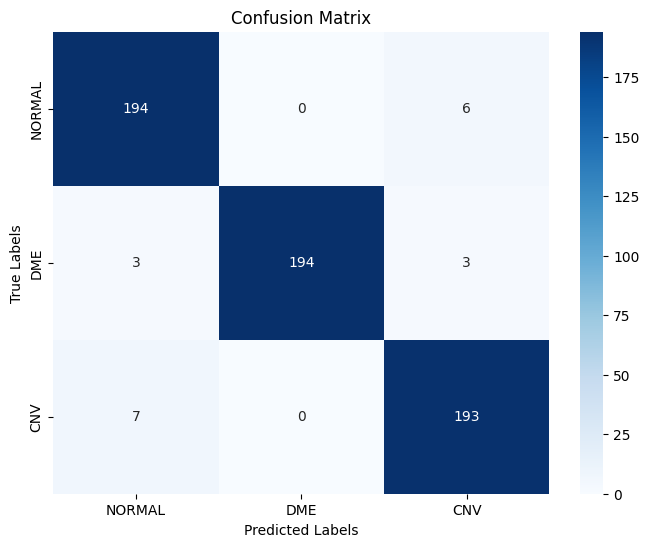

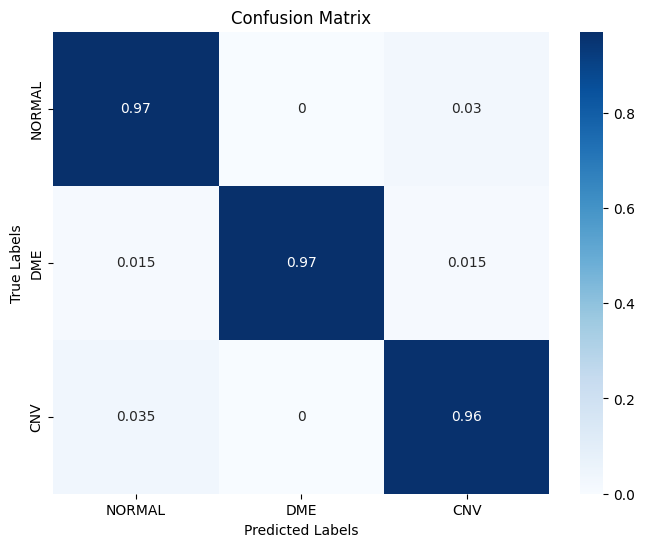

True

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(label_true, label_predict, labels=['NORMAL', 'DME', 'CNV'])
conf_matrix_norm = confusion_matrix(label_true, label_predict, labels=['NORMAL', 'DME', 'CNV'], normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'DME', 'CNV'], yticklabels=['NORMAL', 'DME', 'CNV'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Convert the heatmap to an image
heatmap_image = np.array(heatmap.get_figure().canvas.renderer.buffer_rgba())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap_norm = sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', xticklabels=['NORMAL', 'DME', 'CNV'], yticklabels=['NORMAL', 'DME', 'CNV'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Convert the heatmap to an image
heatmap_norm_image = np.array(heatmap_norm.get_figure().canvas.renderer.buffer_rgba())

cv2.imwrite('/content/oct_my_trdataset/test/conf_matrix.jpeg', heatmap_image)
cv2.imwrite('/content/oct_my_trdataset/test/conf_matrix_norm.jpeg', heatmap_norm_image)

In [ ]:
#@title Inference time calculation on the test data

In [44]:
import os
import datetime
import numpy as np
import cv2
!pip install ultralytics
from ultralytics import YOLO
from joblib import load

#import pickle
#import joblib
#Normal_model = load('/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_NORMAL_18_60.joblib')
#DME_model = load('/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_DME_18_60.joblib')
#CNV_model = load('/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_CNV_18_60.joblib')

Normal_model = dl_model_NORMAL
DME_model = dl_model_DME
CNV_model = dl_model_CNV

model_dict = [Normal_model, DME_model, CNV_model]
model_classification = YOLO('/content/runs/classify/train/weights/best.pt') # build from YAML and transfer weights


In [45]:
#Define an inference time function
def inference(img, model_dict, model_classification):
  start_time = datetime.datetime.now()

  # your functions
  #data transforming using dictionary learning
  img = np.asarray(img) # convert it to ndarray
  img = cv2.resize(img, (512, 512))
  img = img.reshape((1, 512 * 512))
  img = img.astype(float)
  img /= 255.0

  label_conf = []
  label_predict = []
  for dict_num in model_dict:
    img_tr = dict_num.transform(img)
    img_tr2d = img_tr.reshape((18, 18))*255
    img_tr2d = img_tr2d.astype(np.uint8)

    #predict the class using YOLOv8
    classification_result = model_classification(img_tr2d)
    label_conf.append(classification_result[0].probs.top1conf)
    label_predict.append(classification_result[0].names[classification_result[0].probs.top1])

  index = label_conf.index(max(label_conf))
  final_label = label_predict[index]




  end_time = datetime.datetime.now()
  elapsed_time = end_time - start_time
  #print(f"{elapsed_time=}")

  return final_label, elapsed_time


In [46]:
#Images importing
from PIL import Image

img_list = []
dataset_folder = '/content/oct_my_dataset/test/'  # Replace with your source folder path
for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_open = os.listdir(source_folder)

  # Open each image file from the source folder
  for img_name in files_to_open[:10]:
    img_dir = os.path.join(source_folder, img_name)
    image = Image.open(img_dir) # This returns an image object
    img_list.append(image)

In [47]:
#Inference time calculation

label_list = []
inference_list = []
for img in img_list:
  label, time = inference(img, model_dict, model_classification)
  label_list.append(label)
  inference_list.append(time)


0: 32x32 NORMAL 0.97, CNV 0.03, DME 0.00, 6.8ms
Speed: 8.9ms preprocess, 6.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, CNV 0.01, NORMAL 0.00, 8.1ms
Speed: 2.3ms preprocess, 8.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.92, NORMAL 0.06, DME 0.03, 13.1ms
Speed: 3.4ms preprocess, 13.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.98, CNV 0.02, DME 0.00, 5.4ms
Speed: 3.6ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.78, NORMAL 0.20, CNV 0.02, 5.3ms
Speed: 1.9ms preprocess, 5.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.98, DME 0.02, NORMAL 0.00, 4.8ms
Speed: 3.5ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 5.0ms
Speed: 3.0ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 5.7ms
Speed: 1.9ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, NORMAL 0.02, DME 0.02, 6.1ms
Speed: 3.3ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 6.0ms
Speed: 3.4ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.73, NORMAL 0.27, CNV 0.00, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.67, NORMAL 0.24, DME 0.08, 9.5ms
Speed: 4.3ms preprocess, 9.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.9ms
Speed: 2.3ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.92, NORMAL 0.08, CNV 0.00, 4.9ms
Speed: 1.8ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.96, NORMAL 0.03, DME 0.01, 4.8ms
Speed: 1.8ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.1ms
Speed: 1.9ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.95, CNV 0.05, NORMAL 0.00, 4.9ms
Speed: 4.2ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, DME 0.01, NORMAL 0.01, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 6.2ms
Speed: 2.4ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.98, NORMAL 0.02, CNV 0.00, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 6.2ms
Speed: 7.1ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 4.7ms
Speed: 1.7ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 5.0ms
Speed: 1.9ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.00, DME 0.00, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 5.1ms
Speed: 6.5ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.91, NORMAL 0.09, CNV 0.00, 5.0ms
Speed: 1.9ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.01, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.79, DME 0.21, CNV 0.00, 5.1ms
Speed: 3.1ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, DME 0.01, NORMAL 0.00, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.1ms
Speed: 2.4ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 4.7ms
Speed: 2.8ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.53, NORMAL 0.47, DME 0.00, 11.3ms
Speed: 3.2ms preprocess, 11.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.8ms
Speed: 3.8ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.69, CNV 0.31, NORMAL 0.00, 5.8ms
Speed: 3.3ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.71, NORMAL 0.22, DME 0.07, 5.2ms
Speed: 1.8ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.01, 6.0ms
Speed: 2.8ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 5.1ms
Speed: 2.5ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.8ms
Speed: 3.4ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.98, CNV 0.02, NORMAL 0.00, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.85, DME 0.14, NORMAL 0.01, 4.8ms
Speed: 3.8ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 5.4ms
Speed: 4.4ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.92, NORMAL 0.07, CNV 0.01, 6.4ms
Speed: 2.3ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.68, DME 0.22, NORMAL 0.11, 6.2ms
Speed: 3.0ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 5.1ms
Speed: 2.2ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, NORMAL 0.02, DME 0.01, 9.9ms
Speed: 4.2ms preprocess, 9.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.96, CNV 0.04, DME 0.00, 5.1ms
Speed: 1.9ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, NORMAL 0.01, CNV 0.00, 5.5ms
Speed: 3.5ms preprocess, 5.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.0ms
Speed: 4.5ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 4.8ms
Speed: 5.2ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, DME 0.02, NORMAL 0.01, 5.5ms
Speed: 5.1ms preprocess, 5.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 5.1ms
Speed: 2.5ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.77, CNV 0.12, NORMAL 0.11, 5.0ms
Speed: 7.3ms preprocess, 5.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, NORMAL 0.03, DME 0.00, 12.0ms
Speed: 4.8ms preprocess, 12.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 6.4ms
Speed: 2.8ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.84, NORMAL 0.15, CNV 0.00, 4.7ms
Speed: 1.8ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 4.9ms
Speed: 4.8ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 6.4ms
Speed: 2.3ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.63, DME 0.34, NORMAL 0.04, 6.6ms
Speed: 3.1ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.98, DME 0.01, NORMAL 0.01, 10.0ms
Speed: 6.3ms preprocess, 10.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 4.9ms
Speed: 9.6ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.93, NORMAL 0.06, CNV 0.00, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.90, NORMAL 0.08, DME 0.01, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.62, CNV 0.30, DME 0.08, 7.1ms
Speed: 2.7ms preprocess, 7.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, NORMAL 0.01, CNV 0.00, 7.7ms
Speed: 2.9ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.00, DME 0.00, 5.3ms
Speed: 4.5ms preprocess, 5.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 8.1ms
Speed: 3.0ms preprocess, 8.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 5.0ms
Speed: 3.0ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.97, CNV 0.02, DME 0.00, 5.4ms
Speed: 2.1ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.93, NORMAL 0.07, CNV 0.01, 14.9ms
Speed: 5.0ms preprocess, 14.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 8.3ms
Speed: 2.3ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.80, CNV 0.20, DME 0.00, 6.7ms
Speed: 2.8ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, DME 0.01, NORMAL 0.00, 7.2ms
Speed: 2.4ms preprocess, 7.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 5.1ms
Speed: 1.9ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.92, NORMAL 0.07, CNV 0.01, 5.2ms
Speed: 2.9ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.94, NORMAL 0.05, DME 0.01, 5.1ms
Speed: 3.3ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.97, CNV 0.02, DME 0.00, 8.1ms
Speed: 5.8ms preprocess, 8.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, DME 0.01, NORMAL 0.00, 5.1ms
Speed: 5.2ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.9ms
Speed: 2.0ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.93, NORMAL 0.07, CNV 0.00, 4.8ms
Speed: 2.9ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 15.8ms
Speed: 3.6ms preprocess, 15.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.56, CNV 0.34, DME 0.10, 5.0ms
Speed: 5.2ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 5.0ms
Speed: 5.8ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.90, DME 0.10, NORMAL 0.00, 6.7ms
Speed: 2.3ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [48]:
#print the inference time
inference_mean = np.mean(inference_list)
print(f"{inference_mean=}")

inference_mean=datetime.timedelta(seconds=4, microseconds=852850)


In [ ]:
#@title Save folders and experiments on the Google Drive

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dictl_dataset')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_trdataset')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/atoms')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/runs')

In [ ]:
#copy folders to google drive
shutil.copytree("/content/oct_my_dataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/test16/oct_my_dataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test12/oct_my_dataset'

In [ ]:
shutil.copytree("/content/oct_my_dictl_dataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/test16/oct_my_dictl_dataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test15/oct_my_dictl_dataset'

In [38]:
shutil.copytree("/content/oct_my_trdataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/test16/oct_my_trdataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test16/oct_my_trdataset'

In [39]:
shutil.copytree("/content/atoms", "/content/drive/MyDrive/oct_classification/kermany_dataset/test16/atoms")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test16/atoms'

In [49]:
shutil.copytree("/content/runs", "/content/drive/MyDrive/oct_classification/kermany_dataset/test16/runs")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test16/runs'

In [ ]:
#@title repeatability and stablity test for dictionary learning

In [ ]:
import numpy as np
import os
from PIL import Image
import cv2
import shutil
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import MiniBatchDictionaryLearning
from joblib import dump, load
from scipy.stats import ttest_rel

In [ ]:
# @title Selection of some images as the dataset for dictionary learning (open and store)

In [ ]:
shutil.rmtree('/content/oct_my_dictl_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dictl_dataset'

In [ ]:
!mkdir '/content/oct_my_dictl_dataset'


In [ ]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/oct_my_dictl_dataset/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [ ]:
# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset/train/'
#dataset_folder = '/content/OCT2017 /train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dictl_dataset/'  # Replace with your destination folder path
images =[]
#for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for file_name in files_to_copy[:20]:
    if file_name.endswith('.jpeg'):  # Specify the image file formats
          source_path = os.path.join(source_folder, file_name)
          destination_path = os.path.join(destination_folder, subfolder) + '/'
          shutil.copy(source_path, destination_path)
          img = Image.open(os.path.join(destination_path, file_name)) # This returns an image object
          #print(img.mode)
          #img = img.convert('RGB')
          img = np.asarray(img) # convert it to ndarray
          img = cv2.resize(img, (512, 512))
          images.append(img)
#return np.array(images)
          #print(f"Copied: {file_name}")






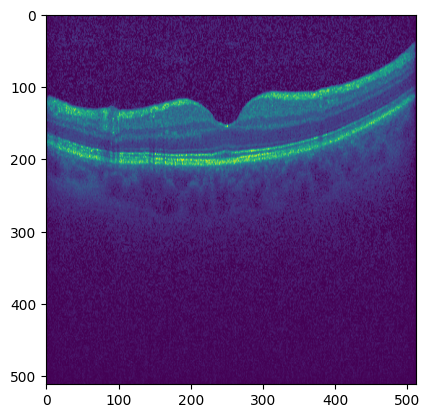

In [ ]:
plt.imshow(images[2])

In [ ]:
#@title dictionary Learning Processs

In [ ]:
# Load dictionary learning images
image_data = np.asarray(images)
n_images, height, width = image_data.shape

In [ ]:
# Flatten the image data
X = image_data.reshape((n_images, height * width))

# Explicitly cast the array to float before division
X = X.astype(float)

# Rescale pixel values to the range [0, 1] for MiniBatchDictionaryLearning
X /= 255.0


# CLASSES: 'NORMAL', 'DME', 'DRUSEN', 'CNV'
#X_NORMAL, X_DME, X_DRUSEN, X_CNV = X[:10], X[10:20], X[20:30], X[30:]
#X_NORMAL, X_DME, X_CNV = X[:10], X[10:20], X[20:30]
X_NORMAL, X_DME, X_CNV = X[:20], X[20:40], X[40:60]

In [ ]:
# Create a dictionary learning model

def dictionary (X, n_components, alpha, batch_size, n_iter):

  dl_model = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

  #Normalized data
  X -= np.mean(X, axis=0)
  X /= np.std(X, axis=0)

  # Fit the model to the flattened image data
  dl_model.fit(X)
  ATOMS = dl_model.components_
  X_tr = dl_model.transform(X)



  return dl_model, ATOMS, X_tr






In [ ]:
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

models_NORMAL = []
atoms_NORMAL = []
X_NORMAL_coef = []
t_statistic = []
p_value = []

for i in range(5):
  model, atoms, coef = dictionary (X_NORMAL, n_components, alpha, batch_size, n_iter)
  models_NORMAL.append(model)
  atoms_NORMAL.append(atoms)
  X_NORMAL_coef.append(coef)


  #Feature extraction percent
  print(f'sparsity percent: {np.mean(X_NORMAL_coef[i] == 0)}')
  X_hat = X_NORMAL_coef[i] @ atoms_NORMAL[i]
  print(f'reconstruction MSE: {np.mean(np.sum((X_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1))}')

  #save the model
  save_dir = os.path.join('/content/dl_model_NORMAL' + f'{i+1}' + '.joblib')
  dump(model, save_dir)



  if i >= 1:
    # Perform a paired t-test on the flattened observations
    t_test, p = ttest_rel(X_NORMAL_coef[i-1].flatten(), X_NORMAL_coef[i].flatten())
    t_statistic.append(t_test)
    p_value.append(p)

    # Print the results
    print(f'T-statistic: {t_test:.4f}')
    print(f'P-value: {p:.4f}')

    # Interpret the results
    if p < 0.05:
        print('The difference in means is statistically significant.')
    else:
        print('There is no significant difference in means.')


# The average values for repeatability of the learned dictionary
print(f't-statistic value: {np.mean(t_statistic):.4f} p-value: {np.mean(p_value):.4f}')
if np.mean(p_value) < 0.05:
        print('The difference in means is statistically significant.')
else:
        print('There is no significant difference in means.')



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.356
reconstruction MSE: 1.0975606481650123e-12


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.3675
reconstruction MSE: 1.680078815493546e-12
T-statistic: 0.7904
P-value: 0.4294
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.432
reconstruction MSE: 1.4857492335823559e-12
T-statistic: -0.0040
P-value: 0.9968
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.4385
reconstruction MSE: 1.2531767543310238e-12
T-statistic: -0.3730
P-value: 0.7092
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.423
reconstruction MSE: 2.5093192432987736e-12
T-statistic: 0.1034
P-value: 0.9176
There is no significant difference in means.


In [ ]:
# The average values for repeatability of the learned dictionary
print(f't-statistic value: {np.mean(t_statistic):.4f} p-value: {np.mean(p_value):.4f}')
if np.mean(p_value) < 0.05:
        print('The difference in means is statistically significant.')
else:
        print('There is no significant difference in means.')


t-statistic value: 0.1292 p-value: 0.7632
There is no significant difference in means.


In [ ]:
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

models_DME = []
atoms_DME = []
X_DME_coef = []
t_statistic_DME = []
p_value_DME = []

for i in range(5):
  model, atoms, coef = dictionary (X_DME, n_components, alpha, batch_size, n_iter)
  models_DME.append(model)
  atoms_DME.append(atoms)
  X_DME_coef.append(coef)


  #Feature extraction percent
  print(f'sparsity percent: {np.mean(X_DME_coef[i] == 0)}')
  X_hat = X_DME_coef[i] @ atoms_DME[i]
  print(f'reconstruction MSE: {np.mean(np.sum((X_hat - X_DME) ** 2, axis=1) / np.sum(X_DME ** 2, axis=1))}')

  #save the model
  save_dir = os.path.join('/content/dl_model_DME' + f'{i+1}' + '.joblib')
  dump(model, save_dir)



  if i >= 1:
    # Perform a paired t-test on the flattened observations
    t_test, p = ttest_rel(X_DME_coef[i-1].flatten(), X_DME_coef[i].flatten())
    t_statistic_DME.append(t_test)
    p_value_DME.append(p)

    # Print the results
    print(f'T-statistic: {t_test:.4f}')
    print(f'P-value: {p:.4f}')

    # Interpret the results
    if p < 0.05:
        print('The difference in means is statistically significant.')
    else:
        print('There is no significant difference in means.')


# The average values for repeatability of the learned dictionary
print(f't-statistic value: {np.mean(t_statistic_DME):.4f} p-value: {np.mean(p_value_DME):.4f}')
if np.mean(p_value_DME) < 0.05:
        print('The difference in means is statistically significant.')
else:
        print('There is no significant difference in means.')



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.443
reconstruction MSE: 2.282760673803931e-12


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.3635
reconstruction MSE: 1.643488989483313e-12
T-statistic: 0.2211
P-value: 0.8250
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.4505
reconstruction MSE: 2.215492039411364e-12
T-statistic: 0.7084
P-value: 0.4788
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.464
reconstruction MSE: 1.6052818009806804e-12
T-statistic: -1.7034
P-value: 0.0886
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.396
reconstruction MSE: 8.967191896572445e-13
T-statistic: 1.4680
P-value: 0.1423
There is no significant difference in means.
t-statistic value: 0.1735 p-value: 0.3837
There is no significant difference in means.


In [ ]:
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

models_CNV = []
atoms_CNV = []
X_CNV_coef = []
t_statistic_CNV = []
p_value_CNV = []

for i in range(5):
  model, atoms, coef = dictionary (X_CNV, n_components, alpha, batch_size, n_iter)
  models_CNV.append(model)
  atoms_CNV.append(atoms)
  X_CNV_coef.append(coef)


  #Feature extraction percent
  print(f'sparsity percent: {np.mean(X_CNV_coef[i] == 0)}')
  X_hat = X_CNV_coef[i] @ atoms_CNV[i]
  print(f'reconstruction MSE: {np.mean(np.sum((X_hat - X_CNV) ** 2, axis=1) / np.sum(X_CNV ** 2, axis=1))}')

  #save the model
  save_dir = os.path.join('/content/dl_model_CNV' + f'{i+1}' + '.joblib')
  dump(model, save_dir)



  if i >= 1:
    # Perform a paired t-test on the flattened observations
    t_test, p = ttest_rel(X_CNV_coef[i-1].flatten(), X_CNV_coef[i].flatten())
    t_statistic_CNV.append(t_test)
    p_value_CNV.append(p)

    # Print the results
    print(f'T-statistic: {t_test:.4f}')
    print(f'P-value: {p:.4f}')

    # Interpret the results
    if p < 0.05:
        print('The difference in means is statistically significant.')
    else:
        print('There is no significant difference in means.')


# The average values for repeatability of the learned dictionary
print(f't-statistic value: {np.mean(t_statistic_CNV):.4f} p-value: {np.mean(p_value_CNV):.4f}')
if np.mean(p_value_CNV) < 0.05:
        print('The difference in means is statistically significant.')
else:
        print('There is no significant difference in means.')



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.3645
reconstruction MSE: 8.996091798394e-13


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.42
reconstruction MSE: 1.0401330881495724e-12
T-statistic: -0.2542
P-value: 0.7994
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.428
reconstruction MSE: 2.147583410878661e-12
T-statistic: 0.0845
P-value: 0.9326
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.444
reconstruction MSE: 2.371668015001676e-12
T-statistic: -0.3083
P-value: 0.7579
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.403
reconstruction MSE: 2.4277534367461093e-12
T-statistic: 0.2232
P-value: 0.8234
There is no significant difference in means.
t-statistic value: -0.0637 p-value: 0.8283
There is no significant difference in means.


In [ ]:
np.shape(X_NORMAL_coef)

(5, 20, 100)

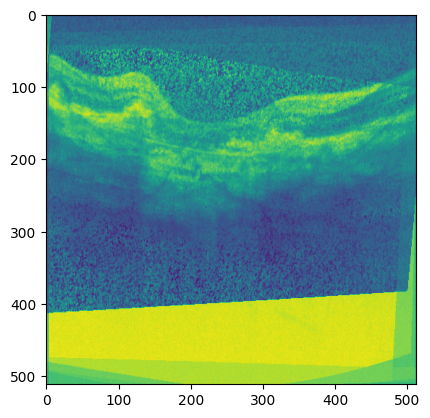

In [ ]:
plt.imshow(atoms_CNV[0][0].reshape(512,512))

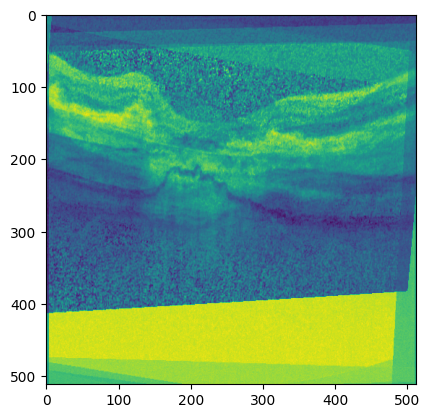

In [ ]:
plt.imshow(atoms_CNV[1][0].reshape(512,512))

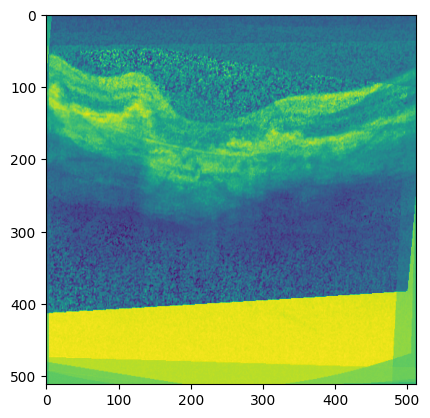

In [ ]:
plt.imshow(atoms_CNV[2][0].reshape(512,512))

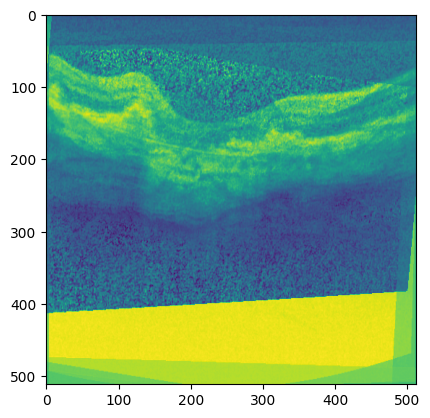

In [ ]:
plt.imshow(atoms_CNV[3][0].reshape(512,512))

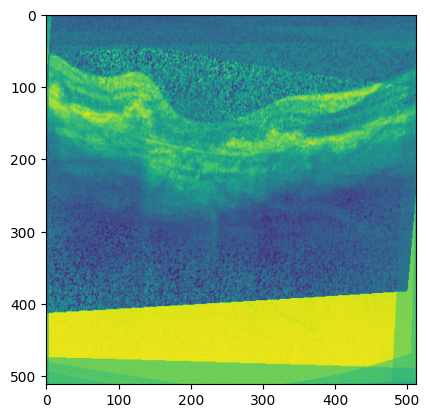

In [ ]:
plt.imshow(atoms_CNV[4][0].reshape(512,512))

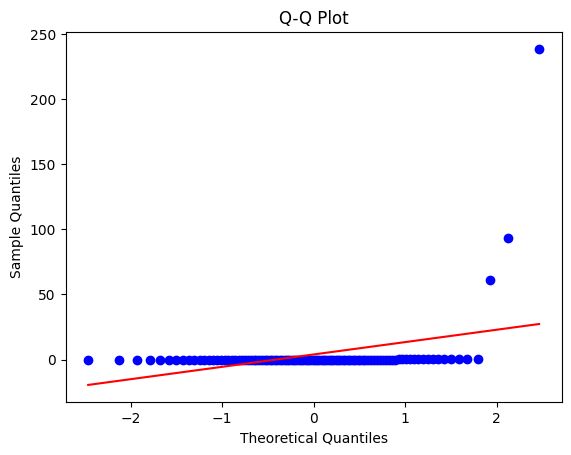

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Generate some example data (replace this with your actual data)
data = X_NORMAL_coef[5]

# Create Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [ ]:
#@title Dictlearn tests - incomplete

In [ ]:
!git clone https://github.com/permfl/dictlearn.git /content/dictlearn

Cloning into '/content/dictlearn'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 152 (delta 1), reused 2 (delta 0), pack-reused 145
Receiving objects: 100% (152/152), 2.11 MiB | 8.41 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!pip install dictlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
%cd /content/dictlearn
!pip install --file requirements.txt

/content/dictlearn

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --file


In [ ]:
!python setup.py install

Installing dictlearn...
Compiling /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pyx because it changed.
Compiling /content/dictlearn/dictlearn/_dictlearn/hessian.pyx because it changed.
[1/2] Cythonizing /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing /content/dictlearn/dictlearn/_dictlearn/hessian.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/dictlearn/dictlearn/_dictlearn/hessian.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running install
/usr/local/lib/python3.10/dist-packag

In [ ]:
import dictlearn as dl
dictionary = dl.dct_dict(256, 8)

AttributeError: module 'dictlearn' has no attribute 'dct_dict'

In [ ]:
import dictlearn as dl
dl.
image = dl.imread('examples/images/house.png')
image_patches = dl.Patches(image, 8)
matrix = image_patches.patches
matrix.shape

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
import matplotlib.pyplot as plt
import dictlearn as dl

denoise = dl.Denoise('noisy_image.png')
denoised_image = denoise.train().denoise()
plt.imshow(denoised_image)
plt.show()

AttributeError: module 'dictlearn' has no attribute 'Denoise'

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
!pip show dictlearn

Name: dictlearn
Version: 0.2.1
Summary: Dictionary Learning Toolbox
Home-page: https://gitlab.com/unibuc/graphomaly/dictionary-learning
Author: Paul Irofti, Denis Ilie-Ablachim, Bogdan Dumitrescu
Author-email: graphomaly@fmi.unibuc.ro
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: 


In [ ]:
print(dir(dl))
dl.kernels()

['DictionaryLearning', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_dictionary_learning', '_get_fit_handle', 'dictionary_learning', 'kernel_dictionary_learning', 'kernels', 'methods', 'online_dictionary_learning', 'sparse_encode']


In [ ]:
import matplotlib.pyplot as plt
import dictlearn as dl
dl.
inpainter = dl.inpaint('image.png', 'mask.png')
inpainted_image = inpainter.train().inpaint()

plt.subplot(121)
plt.imshow(inpainter.patches.image)
plt.title('Original')

plt.subplot(122)
plt.imshow(inpainted_image)
plt.title('Inpainted')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'inpaint'

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2


image = cv2.imread('images/vessel.png')
patches = dl.Patches(image, size=4)
labels = dl.detection.smallest_cluster(patches.patches.T, 2, True)

# Adjust alpha to change the weight for the enhanced image
if len(sys.argv) == 2:
    alpha = float(sys.argv[1])
else:
    alpha = 0.2

vessels = patches.patches * labels
new = alpha*patches.patches + (1 - alpha)*vessels
enhanced = patches.reconstruct(new)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(enhanced)
plt.axis('off')
plt.title('Enhanced')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/CNV-1016042-1.jpeg')

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/CNV-1016042-1.jpeg')
patches = dl.Patches(image, size=4)
labels = dl.detection.smallest_cluster(patches.patches.T, 2, True)

# Adjust alpha to change the weight for the enhanced image
if len(sys.argv) == 2:
    alpha = float(sys.argv[1])
else:
    alpha = 0.2

vessels = patches.patches * labels
new = alpha*patches.patches + (1 - alpha)*vessels
enhanced = patches.reconstruct(new)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(enhanced)
plt.axis('off')
plt.title('Enhanced')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
import time

import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

print("Learning the dictionary... ")
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True, n_init=3)
patch_size = (30, 30)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print("Partial fit of %4i out of %i" % (index, 6 * len(faces.images)))

dt = time.time() - t0
print("done in %.2fs." % dt)

Learning the dictionary... 
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of  100 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
Partial fit of  300 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  400 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Part

In [ ]:
a = faces.images

In [ ]:
a.dtype

dtype('float32')

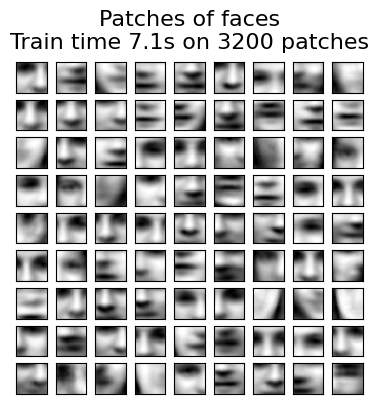

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())


plt.suptitle(
    "Patches of faces\nTrain time %.1fs on %d patches" % (dt, 8 * len(faces.images)),
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()